<h1>TAREA 10</h1>
<h2>Sergio Alejandro Diaz Pinilla</h2>
<h2>Julian Camilo Mendez Corredor</h2>
<br>
<br>
<h2>Punto 1</h2>

<li>Implementar,comounafunciónenpython,losmomentos de Flusser y Suk, y compararlos contra los momentos de Hu, como descriptores de imágenes.
</li>


<h1 style="font-size:100%; background-color:rgba(70, 0, 700, 0.2); color:black; text-align:center; line-height : 30px;">
Visión de Máquina &#8212; F. Prieto </h1>


-----------------------
Imagen 1
-----------------------
Momentos de Hu
Momento  0 :  0.235660754867
Momento  1 :  0.0094484634379
Momento  2 :  0.0101671825501
Momento  3 :  0.000395414469761
Momento  4 :  2.29895443116e-07
Momento  5 :  -1.02486904433e-06
Momento  6 :  7.58765318492e-07
-----------------------
Momentos de Flusser Suk
Momento  0 :  0.0115218819867
Momento  1 :  -1.25969062751e-06
Momento  2 :  -0.000120679395889
Momento  3 :  5.06087551659e-06


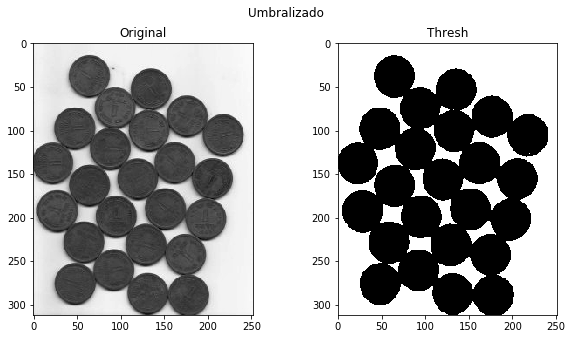

-----------------------
Imagen 2
-----------------------
Momentos de Hu
Momento  0 :  0.222222222235
Momento  1 :  0.0123456790152
Momento  2 :  0.00548696745566
Momento  3 :  0.000219478864054
Momento  4 :  -2.40854767842e-07
Momento  5 :  -2.43865404532e-05
Momento  6 :  3.65042509143e-14
-----------------------
Momentos de Flusser Suk
Momento  0 :  0.00925925926
Momento  1 :  -3.25153445247e-07
Momento  2 :  -5.48696641946e-05
Momento  3 :  -0.000728886202999


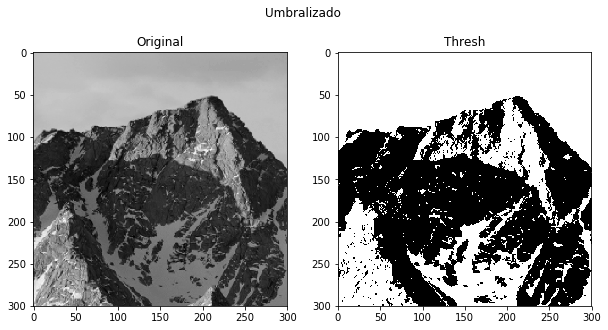

In [2]:
import numpy as np
import cv2
from __future__ import division
import matplotlib.pyplot as plt

def Flusser (M):
    F =[]
    F.append( ((M['mu20'] * M['mu02']) - (M['mu11'])**2)/M['m00']**4)

    F.append( ((M['mu30']**2 * M['mu03']**2) 
           - (6*M['mu30']*M['mu21']*M['mu12']*M['mu03'])
            + (4*M['mu30']*M['mu12']**3) 
            + (4*M['mu03']*M['mu21']**3) 
            - (3*M['mu21']**2 *M['mu12']**2)) 
    / (M['m00']**10)
            )

    F.append( (M['mu20']*(M['mu21'] * M['mu03'] - M['mu12']**2) 
           - M['mu11']*(M['mu30'] * M['mu03'] - M['mu12']*M['mu21'])
           + M['mu02']*(M['mu30'] * M['mu12'] - M['mu21']**2))
    / (M['m00']**7)
            )

    F.append( ((M['mu20']**3 * M['mu03']**2) 
           - (6*M['mu20']**2 *M['mu11']*M['mu12']*M['mu03'])
               - (6*M['mu20']**2 *M['mu02']*M['mu21']*M['mu03'])
               + (9*M['mu20']**2 *M['mu02']*M['mu12']**2)
               + (12*M['mu20'] *M['mu11']**2 *M['mu21']*M['mu03'])
               + (6*M['mu20'] *M['mu11']*M['mu02']*M['mu30']*M['mu03'])
               - (18*M['mu20'] *M['mu11']*M['mu02']*M['mu21']*M['mu12'])
               - (8*M['mu11']**3 *M['mu30']*M['mu03'])
               - (6*M['mu20'] *M['mu02']** 2 *M['mu30']*M['mu12'])
               + (9*M['mu20'] *M['mu02']**2 *M['mu21'])
               + (12*M['mu11']**2 *M['mu02']*M['mu30']*M['mu12'])
               - (6*M['mu11'] *M['mu02']**2 *M['mu30']*M['mu21'])
               + (M['mu02']**3 * M['mu30']**2)) 
    / (M['m00']**11)
        )
    return F

img = cv2.imread('w.jpg',0)
ret, thresh=cv2.threshold(img,127,255,0)
im2,contours, hierarchy=cv2.findContours(thresh,1,2)
cnt= contours[0]
M=cv2.moments(cnt)
F=Flusser(M)
Hu=cv2.HuMoments(M)
print '-----------------------'
print 'Imagen 1'
print '-----------------------'
print 'Momentos de Hu'
for i in range(len(Hu)):
    print 'Momento ',i,': ' ,Hu[i][0]
print '-----------------------'
print 'Momentos de Flusser Suk'
for i in range(len(F)):
    print 'Momento ',i,': ' ,F[i]
plt.figure(1,figsize=(10,5))
plt.suptitle("Umbralizado")
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(122), plt.imshow(thresh, cmap=plt.cm.gray), plt.title('Thresh')
plt.show()

img2 = cv2.imread('square.png',0)
ret, thresh2=cv2.threshold(img2,100,255,0)
im2,contours2, hierarchy=cv2.findContours(thresh2,1,2)
cnt2= contours2[0]
M2=cv2.moments(cnt2)
F2=Flusser(M2)
Hu2=cv2.HuMoments(M2)
print '-----------------------'
print 'Imagen 2'
print '-----------------------'
print 'Momentos de Hu'
for i in range(len(Hu2)):
    print 'Momento ',i,': ' ,Hu2[i][0]
print '-----------------------'
print 'Momentos de Flusser Suk'
for i in range(len(F2)):
    print 'Momento ',i,': ' ,F2[i]
plt.figure(2,figsize=(10,5))
plt.suptitle("Umbralizado")
plt.subplot(121), plt.imshow(img2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(122), plt.imshow(thresh2, cmap=plt.cm.gray), plt.title('Thresh')
plt.show()

<p>Comparando los metodos no ortogonales de Hu y de Flusser Suk podemos observar que:</p>
  <li>En los momentos de Hu se observa una tendencia del coeficiente a disminuir, mientras que para Flusser, este no parece tener un patron</li>
  <li>Algunos de los coeficiente entre los 2 metodos tienen ciertas similitudes para las 2 imagenes</li>
<p>Se puede concluir que si bien los momentos de Flusser son menos, aportan informacion menos redundante
</p>

<h2>Punto 2</h2>

<p>Implementar,como una función en python,alguno de los siguientes momentos ortogonales para imágenes:</p>
  <li>Momentos de Legendre.</li>
  <li>Momentos de Zernike.</li>
<p>y compararlos contra los momentos no ortogonales, como descriptores de imágenes.
</p>

-----------------------
Imagen 1
-----------------------
Momentos de Zernike
A00:  0.782179011727 0.0
A11:  0.0804567765691 166.962023102
A22:  0.0789756933805 -152.498220607
A33:  0.0459366959916 -97.0154608423
A44:  0.0532499618846 -83.5122348999
A55:  0.0938289195043 -129.317593195
A66:  0.0476547216345 -147.767284519
A77:  0.0681776623839 136.325814414
-----------------------
Momentos de Hu
Momento  0 :  0.235660754867
Momento  1 :  0.0094484634379
Momento  2 :  0.0101671825501
Momento  3 :  0.000395414469761
Momento  4 :  2.29895443116e-07
Momento  5 :  -1.02486904433e-06
Momento  6 :  7.58765318492e-07


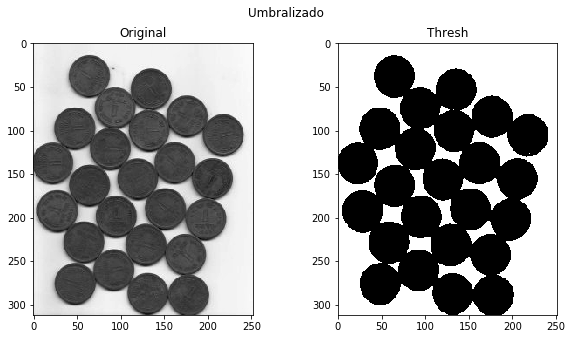

-----------------------
Imagen 2
-----------------------
Momentos de Zernike
A00:  0.604719263252 0.0
A11:  0.169159795291 96.7865042286
A22:  0.206737444037 3.67718521935
A33:  0.0625480896026 98.0178440476
A44:  0.14160087184 67.4758633583
A55:  0.143979199679 -144.403263381
A66:  0.124906526652 -7.2639307393
A77:  0.0186264534151 -53.8708624108
-----------------------
Momentos de Hu
Momento  0 :  0.222222222235
Momento  1 :  0.0123456790152
Momento  2 :  0.00548696745566
Momento  3 :  0.000219478864054
Momento  4 :  -2.40854767842e-07
Momento  5 :  -2.43865404532e-05
Momento  6 :  3.65042509143e-14


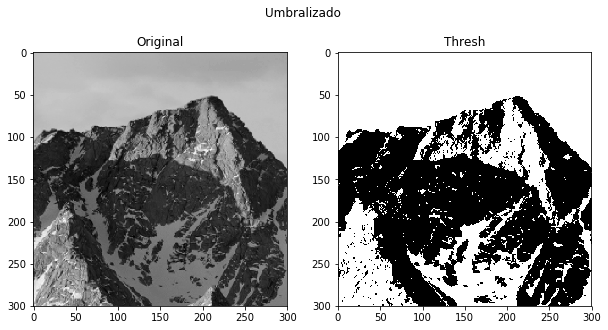

In [7]:
# -------------------------------------------------------------------------
# Copyright C 2015 Gefu Tang
# tanggefu@gmail.com
#
# License Agreement: To acknowledge the use of the code please cite the
#                    following papers:
#
# [1] A. Tahmasbi, F. Saki, S. B. Shokouhi,
#     Classification of Benign and Malignant Masses Based on Zernike Moments,
#     Comput. Biol. Med., vol. 41, no. 8, pp. 726-735, 2011.
#
# [2] F. Saki, A. Tahmasbi, H. Soltanian-Zadeh, S. B. Shokouhi,
#     Fast opposite weight learning rules with application in breast cancer
#     diagnosis, Comput. Biol. Med., vol. 43, no. 1, pp. 32-41, 2013.
# -------------------------------------------------------------------------

from math import factorial


# -------------------------------------------------------------------------
# Function to compute Zernike Polynomials:
#
# rad = radialpoly(r,n,m)
# where
#   r = radius
#   n = the order of Zernike polynomial
#   m = the repetition of Zernike moment
# -------------------------------------------------------------------------
def radialpoly(r, n, m):
    rad = np.zeros(r.shape, r.dtype)
    P = (n - abs(m)) / 2
    Q = (n + abs(m)) / 2
    for s in xrange(int(P + 1)):
        c = (-1) ** s * factorial(n - s)
        c /= factorial(s) * factorial(Q - s) * factorial(P - s)
        rad += c * r ** (n - 2 * s)
    return rad


# -------------------------------------------------------------------------
# Function to find the Zernike moments for an N x N binary ROI
#
# Z, A, Phi = Zernikmoment(src, n, m)
# where
#   src = input image
#   n = The order of Zernike moment (scalar)
#   m = The repetition number of Zernike moment (scalar)
# and
#   Z = Complex Zernike moment
#   A = Amplitude of the moment
#   Phi = phase (angle) of the mement (in degrees)
#
# Example:
#   1- calculate the Zernike moment (n,m) for an oval shape,
#   2- rotate the oval shape around its centeroid,
#   3- calculate the Zernike moment (n,m) again,
#   4- the amplitude of the moment (A) should be the same for both images
#   5- the phase (Phi) should be equal to the angle of rotation
# -------------------------------------------------------------------------
def Zernikemoment(src, n, m):
    if src.dtype != np.float32:
        src = np.where(src > 0, 0, 1).astype(np.float32)
    if len(src.shape) == 3:
        print 'the input image src should be in gray'
        return

    H, W = src.shape
    if H > W:
        src = src[int((H - W) / 2): int((H + W) / 2), :]
    elif H < W:
        src = src[:, int((W - H) / 2): int((H + W) / 2)]

    N = src.shape[0]
    if N % 2:
        src = src[:-1, :-1]
        N -= 1
    x = range(N)
    y = x
    X, Y = np.meshgrid(x, y)
    R = np.sqrt((2 * X - N + 1) ** 2 + (2 * Y - N + 1) ** 2) / N
    Theta = np.arctan2(N - 1 - 2 * Y, 2 * X - N + 1)
    R = np.where(R <= 1, 1, 0) * R

    # get the radial polynomial
    Rad = radialpoly(R, n, m)
    Product = src * Rad * np.exp(-1j * m * Theta)
    # calculate the moments
    Z = Product.sum()

    # count the number of pixels inside the unit circle
    cnt = np.count_nonzero(R) + 1
    # normalize the amplitude of moments
    Z = (n + 1) * Z / cnt
    # calculate the amplitude of the moment
    A = abs(Z)
    # calculate the phase of the mement (in degrees)
    Phi = np.angle(Z) * 180 / np.pi

    return Z, A, Phi


img = cv2.imread('w.jpg',0)

ret, thresh=cv2.threshold(img,127,255,0)



print '-----------------------'
print 'Imagen 1'
print '-----------------------'
print 'Momentos de Zernike'
for i in range(8):
    Z, A, Phi = Zernikemoment(thresh, i, i)    
    print "A"+str(i)+str(i)+": ", A, Phi
print '-----------------------'
print 'Momentos de Hu'
for i in range(len(Hu)):
    print 'Momento ',i,': ' ,Hu[i][0]
plt.figure(1,figsize=(10,5))
plt.suptitle("Umbralizado")
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(122), plt.imshow(thresh, cmap=plt.cm.gray), plt.title('Thresh')
plt.show()

img2 = cv2.imread('square.png',0)

ret, thresh2=cv2.threshold(img2,100,255,0)

print '-----------------------'
print 'Imagen 2'
print '-----------------------'
print 'Momentos de Zernike'
for i in range(8):
    Z, A, Phi = Zernikemoment(thresh2, i, i)    
    print "A"+str(i)+str(i)+": ", A, Phi
print '-----------------------'
print 'Momentos de Hu'
for i in range(len(Hu2)):
    print 'Momento ',i,': ' ,Hu2[i][0]
plt.figure(2,figsize=(10,5))
plt.suptitle("Umbralizado")
plt.subplot(121), plt.imshow(img2, cmap=plt.cm.gray), plt.title('Original')
plt.subplot(122), plt.imshow(thresh2, cmap=plt.cm.gray), plt.title('Thresh')
plt.show()

<p>Comparando los metodos ortogonales de Zernike y no ortogonales de Hu podemos observar que:</p>
  <li>Los momentos de Zernike, para las 2 imagenes, tienden a quedarse dentro de un rango (0.01 y 0.15), mientras que los momentos de Hu varian mas</li>
  <li>Los primeros coeficiente de los 2 metodos no son tan lejanos entre si, mientras que los demas coeficientes si lo son</li>
